<a href="https://colab.research.google.com/github/MaggieNjenga/Phase-2-Project/blob/main/student_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Margaret Nduta Njenga
* Student pace: part time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:



**HOMESTEAD HILARITY: SERIOUS SALES, SMILING FACES**

**BUSINESS PROBLEM**

**Stakeholder : Real Estate Agency**

The real estate agency faces challenges in accurately predicting house prices and understanding key factors influencing house sales in the region, leading to potential pricing inaccuracies and suboptimal sales strategies. To address these challenges, the agency aims to develop a predictive model that accurately forecasts house prices based on various factors such as location, property characteristics, and market conditions. By analyzing the data, the agency seeks to identify the most important factors influencing house prices and improve its decision-making process with data-driven insights. This approach can enhance pricing accuracy, optimize sales strategies, increase sales volume, and improve profitability, ultimately leading to better client satisfaction and long-term success in the real estate industry.




**BUSINESS PROBLEM 2**

**Stakeholder : Homebuyers**

As prospective homebuyers seek to navigate the real estate market in the area, there's a critical need for access to comprehensive insights into trends in house prices and the key factors shaping them. The challenge is to develop a predictive model that accurately forecasts future house prices based on various economic, demographic, and locational variables. By providing homebuyers with data-driven analyses and actionable information, the goal is to empower them to make well-informed purchasing decisions, optimize their investment potential, and secure their desired properties in a competitive market environment.

**The questions we can consider here include;

For Real Estate Agency:

1. What are the key factors influencing house sales in the region, and how can they leverage this information to optimize sales strategies?
2. How can data-driven insights enhance their decision-making process and overall profitability?

For Homebuyers

1. What trends in house prices should they be aware of, and how might they impact their decision-making?
2. How can they optimize their investment potential in the real estate market?

**DATA UNDERSTANDING**

The dataset comprises real estate records, sourced from King County database of house sales, with each row representing an individual house listing or sale. It includes various descriptive features such as the number of bedrooms, bathrooms, square footage of living space and lot size, as well as categorical variables like condition, grade, and waterfront status. Temporal data on the year built and year renovated, along with geospatial coordinates (latitude and longitude), are also provided. The primary target variable is the sale price of the houses. These data are essential for stakeholders seeking comprehensive insights into house prices and the factors influencing them, aligning with the objective of developing predictive models to forecast future house prices accurately.

In this section, we will undertake a series of steps to enhance our understanding of the data at hand and to prepare it for modeling purposes. We'll engage in some data cleaning and preliminary analyses to gain insight.

We begin by importing the necessary libraries required to carry out various tasks.

In [ ]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import numpy as np
import statsmodels.api as sm

Next, we load the dataset, specifically the KC house data provided, and read it, displaying its contents to examine its structure and contents.

In [ ]:
#load the dataset
with open("data/kc_house_data.csv") as f:
    df = pd.read_csv(f)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset is structured in a tabular format, comprising rows and columns. Among the visible column names are "date," "price," "bathrooms," etc., along with their respective elements. Further exploration can reveal additional details, such as the data types of the columns and the total number of columns available.

In [ ]:
#display information about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We could further explore by examining the initial rows of the dataset, its size, column names, data types, and additional details if you wish to delve deeper into the analysis.

In [ ]:
#display the first few rows of the dataset to visually inspect the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#display the size of the data
print(df.shape)
print()
#display all the columns of the dataset
print(df.columns)
print()
#display the data types of each column
print(df.dtypes)

(21597, 21)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In summary, our original dataset comprises 21,597 rows and 21 columns. The column names are clearly visible, and upon inspection, we observe that the dataset contains 15 numerical data types (floats and integers) and 6 categorical data types (strings).

Now equipped with a better understanding of both the business problem and the dataset, we can proceed to prepare the data for analysis and modeling. This involves identifying the variables to be utilized and devising strategies to address the business problem questions using the available data.

**DATA PREPARATION**

In this section, we will be readying our data for thorough analysis and modeling. This encompasses tasks such as cleaning the data by addressing missing or duplicated values, ensuring that each column's data types are appropriately formatted for analysis, calculating basic descriptive statistics for numerical columns, among other procedures. This phase aims to provide valuable insights into the data and how it can be leveraged to address our problem effectively.

We can begin by creating a duplicate of our dataset to allow us to manipulate the copy while preserving our original dataset in case it is needed later on.

In [ ]:
#make a copy of the original data, df
df2 = df.copy()
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
#check for duplicates and missing values if any
print(df2.duplicated().sum())
print()
print(df2.isnull().sum())

0

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


We observe that the waterfront, view, and yr_renovated columns contain missing values. Prior to determining whether these missing values should be dropped or adjusted, we will conduct a more thorough examination of the data within these columns

In [ ]:
# Select the categorical columns
categorical_columns = ['waterfront', 'view', 'condition', 'grade']

# Analyze unique values and frequencies for each categorical variable
for col in categorical_columns:
    unique_values = df2[col].unique()
    frequencies = df2[col].value_counts()

    print(f"\nColumn: {col}")
    print("Unique Values:")
    print(unique_values)
    print("\nValue Frequencies:")
    print(frequencies)


Column: waterfront
Unique Values:
[nan 'NO' 'YES']

Value Frequencies:
NO     19075
YES      146
Name: waterfront, dtype: int64

Column: view
Unique Values:
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Value Frequencies:
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Column: condition
Unique Values:
['Average' 'Very Good' 'Good' 'Poor' 'Fair']

Value Frequencies:
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Column: grade
Unique Values:
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']

Value Frequencies:
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name:

The occurrence of missing values within each column represents only a minor proportion in comparison to the overall dataset size. Nonetheless, removing these values would considerably diminish the dataset's volume, potentially leading to inaccurate outcomes. Moreover, discarding entire columns isn't feasible, as they hold relevance in analyzing their association with price. Therefore, we opt to fill these missing values to maintain data integrity and preserve the columns' relevance for subsequent analyses.  Additionally, we convert the categorical variables into nominal values for further analysis.

In [ ]:
# Replace missing values in 'waterfront' column with 'NO'
df2['waterfront'].fillna('NO', inplace=True)

# Map 'NO' to 0 and 'YES' to 1 in 'waterfront' column
df2['waterfront'] = df2['waterfront'].map({'NO': 0, 'YES': 1})

# Display the updated unique values and their frequencies
print("Updated Unique Values for 'waterfront' column:")
print(df2['waterfront'].value_counts())

Updated Unique Values for 'waterfront' column:
0    21451
1      146
Name: waterfront, dtype: int64


In [ ]:
#fill the miising values in the view column with NONE
df2.loc[df.view.isnull(), 'view'] = 'NONE'

#convert the view column to numerical values
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4 }
df2['view'].replace(view_dict, inplace = True)

# Display the updated unique values and their frequencies
print(df2['view'].value_counts())

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64


In [ ]:
#fill the miising values in the yr_renovated column with 0
df2.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0

#create a new column,df2['renovated' that maps renovated houses to 1 and those that are not renovated to 0
df2['renovated'] = df2['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Display the updated unique values and their frequencies
print(df2['renovated'].value_counts())

0    20853
1      744
Name: renovated, dtype: int64


In [ ]:
# replace ? values in the 'sqft_basement' column with 0 and convert the column to numerical values
df2['sqft_basement'] = df2['sqft_basement'].replace('?', '0').astype('float')

# Display the updated unique values and their frequencies
print(df2['sqft_basement'].value_counts())

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64


In [ ]:
# Convert 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

#create a new column, 'month' that takes the months of each date
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


In [ ]:
#convert the condition column to numerical values
view_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
df2['condition'].replace(view_dict, inplace=True)

# Display the updated unique values and their frequencies
print(df2['condition'].value_counts())

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64


In [ ]:
#convert the grade column to numerical values
df2['grade'] = df2['grade'].map(lambda x: int(x.split(' ')[0]))

# Display the updated unique values and their frequencies
print(df2['grade'].value_counts())

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [ ]:
#create a new column, 'age' that is the number of years a house has lived
df2['age'] = df2['date'].dt.year - df2['yr_built']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Our data has been prepared and is now ready for analysis and modeling. Above, you can find the details of our updated dataset. Compared to the original dataset, the new dataset consists of 21,597 rows and 24 columns instead of 21. We have introduced three new columns, namely 'renovated', 'month', and 'age'. The column names are clearly visible, and upon inspection, we note that the new dataset comprises 23 numerical data types (floats and integers) and 1 datetime data type. In contrast, the original dataset contained 15 numerical data types (floats and integers) and 6 categorical data types (strings).

**ANALYSIS AND VISUALIZATIONS**

Prior to conducting regression analysis and modeling, it is essential to visualize our dataset to gain a comprehensive understanding of the variables involved. Our focus variable, price, will serve as the dependent variable (Y) in our models, while the remaining columns will function as independent variables (X). This step will provide us with a broader perspective on the data and its various attributes before proceeding with our analytical tasks.

We first start by performing some descriptive statistics for each column

In [ ]:
# Compute descriptive statistics
statistics = df2.describe()

# Display descriptive statistics
print(statistics)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      2.409825   
std    4.141264e+04      0.539683      0.081944    

We then visualize the distribution of numerical variables using histograms or box plots to understand their spread and identify any outliers or skewed distributions.

In [ ]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'month',
       'age'],
      dtype='object')

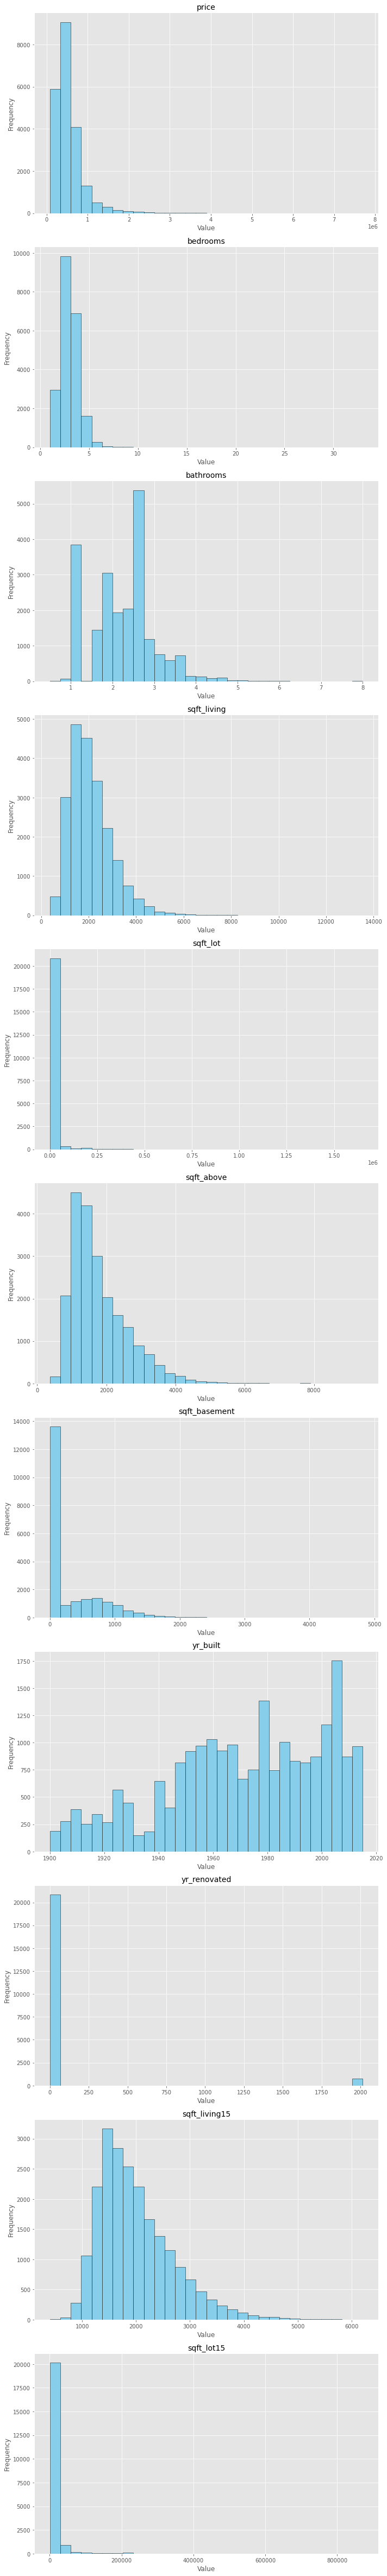

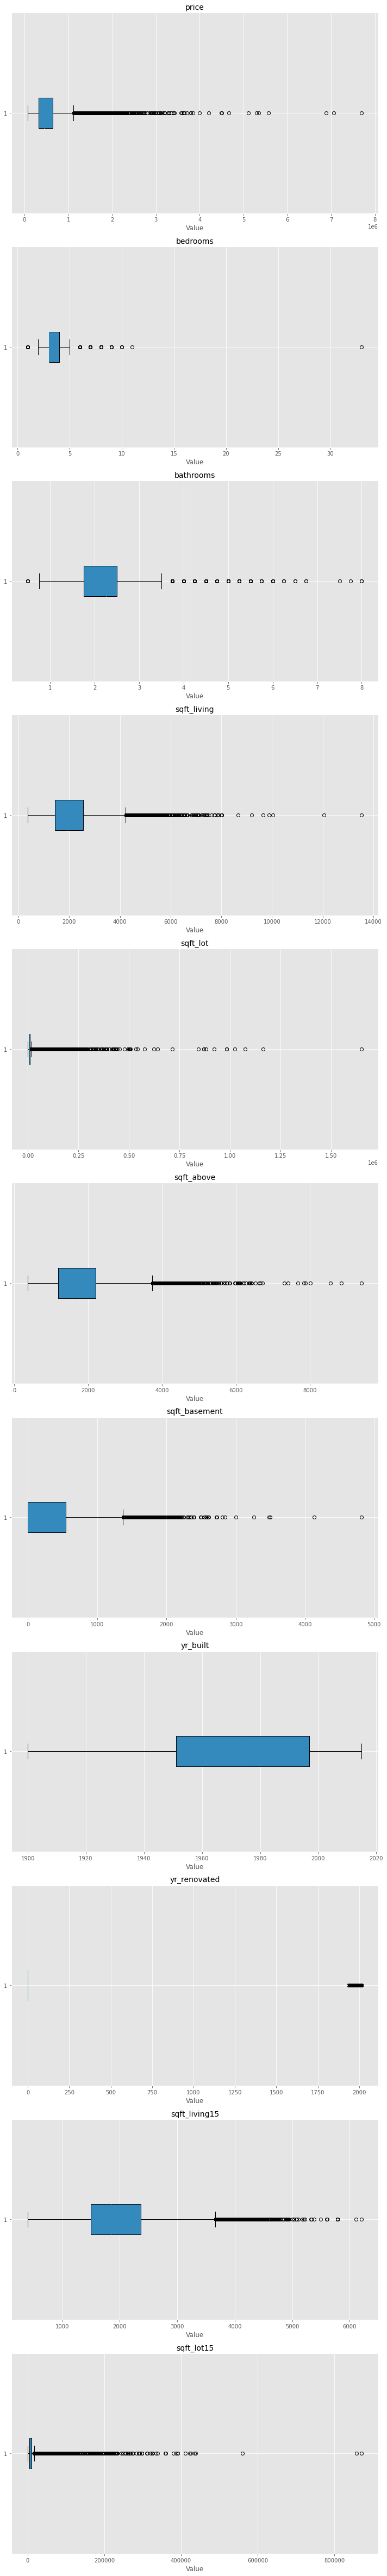

In [ ]:
# Select the numerical columns
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                     'sqft_living15', 'sqft_lot15']

# Create subplots for each numerical variable
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))

# Plot histograms for each numerical variable
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df2[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Create box plots for each numerical variable
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))

# Plot box plots for each numerical variable
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.boxplot(df2[col], vert=False, patch_artist=True)
    ax.set_title(col, fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Based on the analysis conducted above, we will only remove outliers for the 'price' and 'bedroom' variables. For the remaining variables, we will retain their original values as the outliers observed are relatively minor and are not expected to significantly impact our model.

In [ ]:
#filter out the outliers in price
price_clean = df2[(df2.price < df2.price.quantile(.995))
                  & (df2.price > df2.price.quantile(.005))]

#change the outlier figure in bedroom to 3 because it seems like a typing error
df2.loc[(df2.bedrooms == 33), 'bedrooms'] = 3

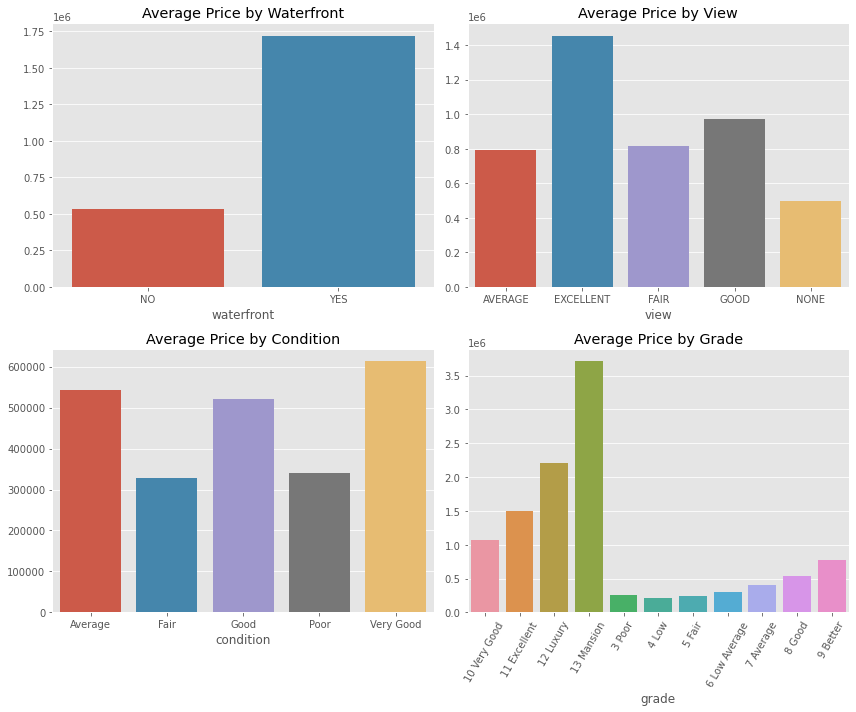

In [ ]:
#Exploring relationships between categorical variables with price
# Calculate the mean price for each category of the categorical variables
mean_price_by_waterfront = df.groupby('waterfront')['price'].mean()
mean_price_by_view = df.groupby('view')['price'].mean()
mean_price_by_condition = df.groupby('condition')['price'].mean()
mean_price_by_grade = df.groupby('grade')['price'].mean()

# Plot bar plots for each categorical variable against the average price
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x=mean_price_by_waterfront.index, y=mean_price_by_waterfront.values, ax=axs[0, 0])
axs[0, 0].set_title('Average Price by Waterfront')

sns.barplot(x=mean_price_by_view.index, y=mean_price_by_view.values, ax=axs[0, 1])
axs[0, 1].set_title('Average Price by View')

sns.barplot(x=mean_price_by_condition.index, y=mean_price_by_condition.values, ax=axs[1, 0])
axs[1, 0].set_title('Average Price by Condition')

sns.barplot(x=mean_price_by_grade.index, y=mean_price_by_grade.values, ax=axs[1, 1])
axs[1, 1].set_xticks(range(len(mean_price_by_grade.index)))
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=60)
axs[1, 1].set_title('Average Price by Grade')


plt.tight_layout()
plt.show()

In [ ]:
#we have 20680 houses that haven't been renovated which is 96% of the houses, thus we can drop the column yr_renovated
#we will also drop the id column as well
df2 = df2.drop(['id','yr_renovated'], axis = 1)
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,0.0,1955,98178,47.5112,-122.257,1340,5650,0,10,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,400.0,1951,98125,47.7210,-122.319,1690,7639,1,12,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,2,...,0.0,1933,98028,47.7379,-122.233,2720,8062,0,2,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,910.0,1965,98136,47.5208,-122.393,1360,5000,0,12,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,0.0,1987,98074,47.6168,-122.045,1800,7503,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,0.0,2009,98103,47.6993,-122.346,1530,1509,0,5,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,0.0,2014,98146,47.5107,-122.362,1830,7200,0,2,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,0.0,2009,98144,47.5944,-122.299,1020,2007,0,6,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,0.0,2004,98027,47.5345,-122.069,1410,1287,0,1,11


Next we can perform correlation analysis

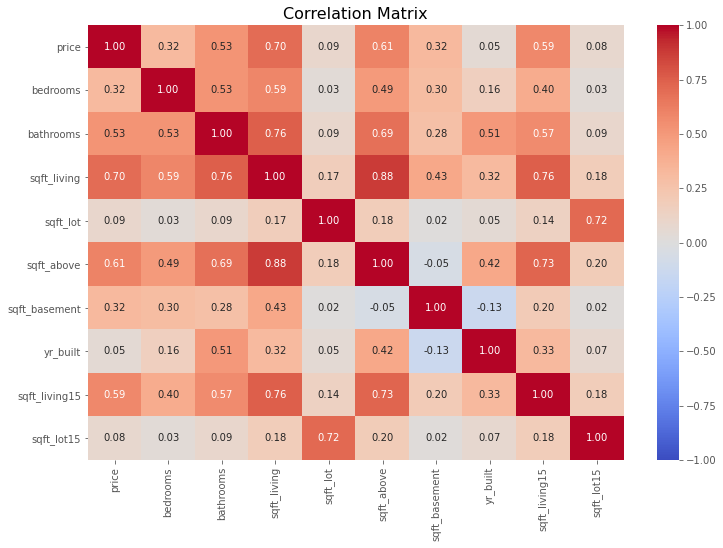

Correlation with Price:
bedrooms         0.315954
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64


In [ ]:
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'sqft_above', 'sqft_basement', 'yr_built',
                     'sqft_living15', 'sqft_lot15']

# Calculate the correlation matrix
correlation_matrix = df2[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Extract correlation of numerical variables with the target variable (price)
correlation_with_price = correlation_matrix['price'].drop('price')  # Drop price itself from the correlation matrix
print("Correlation with Price:")
print(correlation_with_price)

In [ ]:
# Calculate the correlation matrix for all columns
df2_corrs = df2.corr()['price'].map(abs).sort_values(ascending=False)
df2_corrs

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315954
lat              0.306692
waterfront       0.264306
floors           0.256804
renovated        0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
age              0.053890
zipcode          0.053402
condition        0.036056
long             0.022036
month            0.009928
Name: price, dtype: float64

Based on the correlations above, the dependent variable, price, has a higher correlation with 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' and 'bathrooms'. We can build our model based on these correlations

Here we perform Temporal Analysis

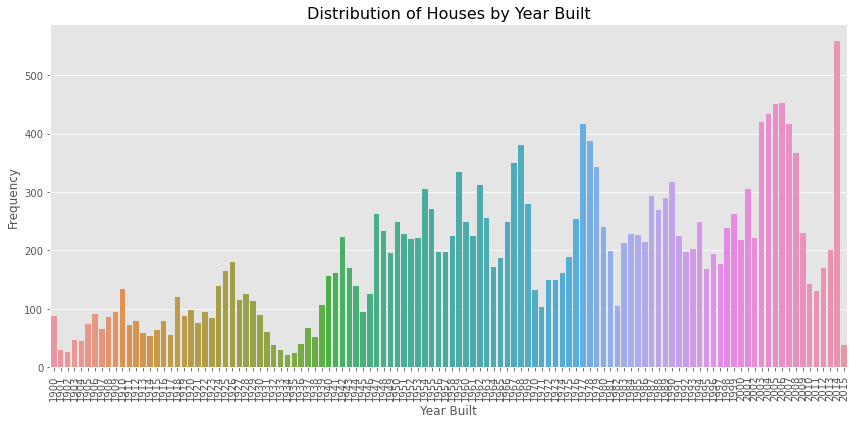

In [ ]:
# Create a count plot for year built
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='yr_built')
plt.title('Distribution of Houses by Year Built', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


Then Geospatial Analysis

In [ ]:
# Create a map centered at the mean latitude and longitude coordinates
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Add markers for each house location
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(map)

# Display the map
map.save('house_distribution_map.html')  # Save the map to an HTML file

**LINEAR REGRESSION**

In this section, we are going to identify the relationship between price and other independent variables using regression models.

**Simple Linear Regression**

Initially, we will employ a basic linear regression model to ascertain the connection between price and a single independent variable. Our initial focus will be on examining the correlation between price and sqft_living, given its highest correlation coefficient with price.

In [ ]:
#Specifying the X and y variables
X = df2['sqft_living']
y = df2['price']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:12:58   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

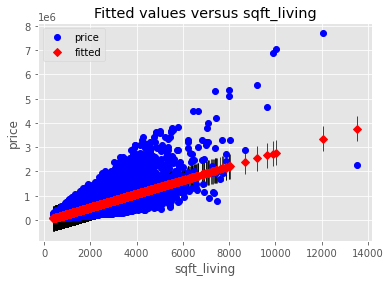

In [ ]:
#Creating the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

#fitting the model
results = model.fit()

#print the summary of the OLS Regression results
print(results.summary())

#visualizing the model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

Looking at the summary above, we can see that the regression line we found was

$$ \hat{mpg} = -4.399e+04 + 280.8630 sqft_living $$


From the R-squared value, our model explains about 49% of the variance in price, the dependent variable

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05

If the sqft_living was 0, we would expect price to be about -4.399e+04

For each increase of 1 in sqft_living, we see an associated icrease in price of about 280.9

The model may not be useful for making predictions or drawing meaningful conclusions about the relationship between sqft_living and price.

**Multiple linear regression**

We need more features to be able to predict price, therefore we need to use multiple linear regression instead of simple linear regression which only takes in one independent variable at a time

Here, we can use the first 5 features with the highest correlation to price

In [ ]:
X_second = df2[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]]
X_second

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,1180,7,1180,1340,1.00
1,2570,7,2170,1690,2.25
2,770,6,770,2720,1.00
3,1960,7,1050,1360,3.00
4,1680,8,1680,1800,2.00
...,...,...,...,...,...
21592,1530,8,1530,1530,2.50
21593,2310,8,2310,1830,2.50
21594,1020,7,1020,1020,0.75
21595,1600,8,1600,1410,2.50


In [ ]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:13:00   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.52e+05   1.36e+04    -48.079

From the R-squared value, our model explains about 54% of the variance in price, the dependent variable.

This is an improvement from the R_squared from our simple regression model which explained about 49% of the variance in price.

We still need to explore more features to see how they affect price by improving our model

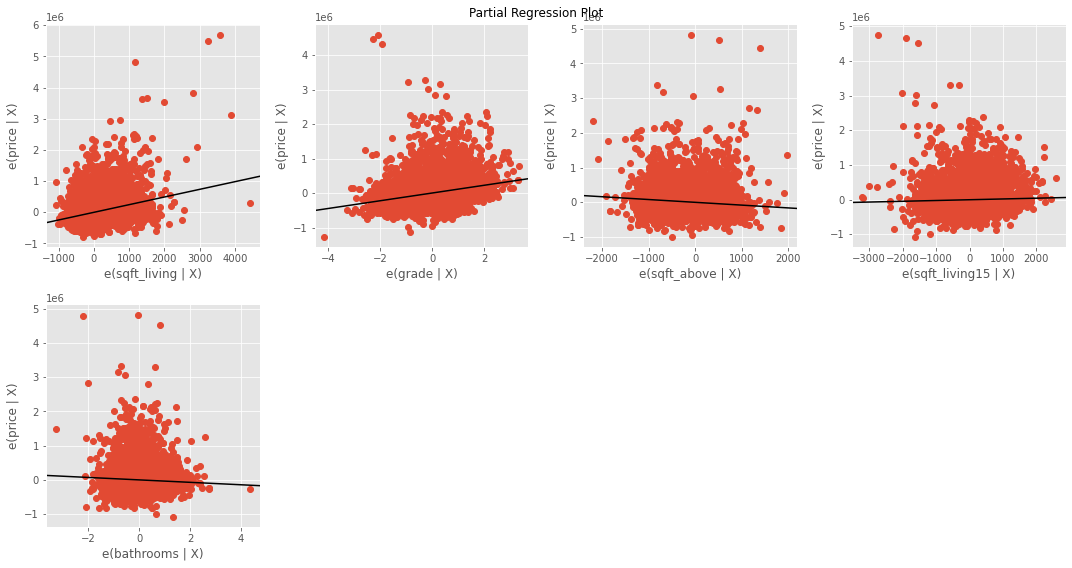

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    second_results,
    exog_idx=list(X_second.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

From above, we're seeing more of a cluster of dots rather than a clean linear relationship. We also see that several of them have slopes near zero.

Let us now use all the features in our data set apart from our target variable, price, to see if the new model is going to be better than the old one.

In [ ]:
# dropping mpg because this is our target, then only selecting numeric features
X_all = df2.drop("price", axis=1).select_dtypes("number")
X_all

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month,age
0,3,1.00,1180,5650,1.0,0,0,2,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,10,59
1,3,2.25,2570,7242,2.0,0,0,2,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1,12,63
2,2,1.00,770,10000,1.0,0,0,2,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0,2,82
3,4,3.00,1960,5000,1.0,0,0,4,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0,12,49
4,3,2.00,1680,8080,1.0,0,0,2,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,2,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,0,5,5
21593,4,2.50,2310,5813,2.0,0,0,2,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,0,2,1
21594,2,0.75,1020,1350,2.0,0,0,2,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,0,6,5
21595,3,2.50,1600,2388,2.0,0,0,2,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,0,1,11


In [ ]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2543.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:13:02   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21576   BIC:                         5.888e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.906e+07   9.93e+06     -6.957

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 70% of the variance in MPG

All of the model coefficients are statistically significant apart from month which has p-values above 0.05. This means it has no effect on price, and is thus not statistically significant at an alpha of 0.05

**Comparing to our baseline model**

The R-squared and adjusted R-squared values for this model (0.702) are higher than the previous model (0.493). This indicates that the current model explains more variance in house prices than the previous one.

The F-statistic for this model (2543.41) is also significantly higher than the previous model (20970), further supporting the significance of the current regression model.

Based on these results, it appears that the current model performs better than the previous one. However, there is always room for improvement.

**VISUALIZATION**

**Coefficient Plot**

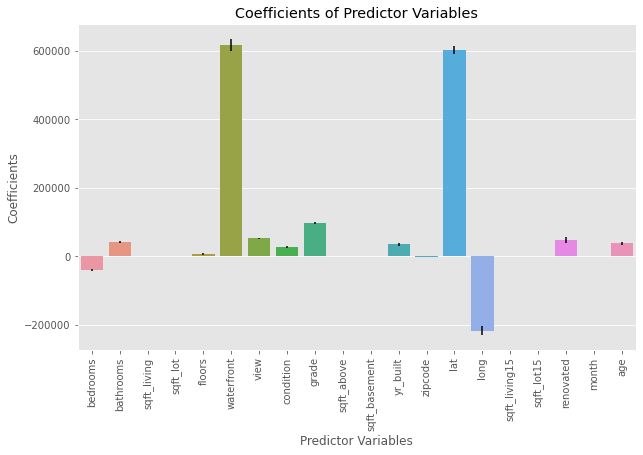

In [ ]:
# Extract coefficients and their standard errors
coefficients = third_results.params.drop('const')
errors = third_results.bse.drop('const')

# Plot coefficients with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, yerr=errors.values)
plt.xticks(rotation=90)
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of Predictor Variables')
plt.show()

**Residual Plot**

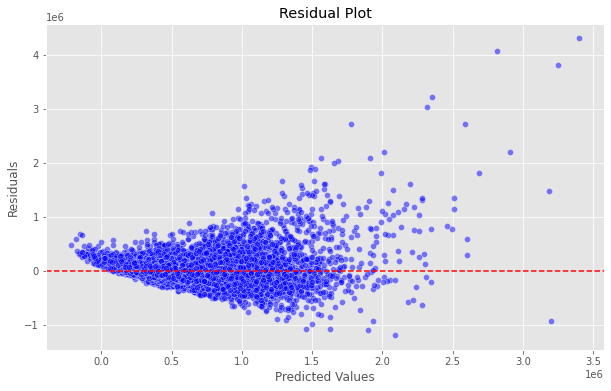

In [ ]:
# Extract actual and predicted values
actual_values = y
predicted_values = third_results.fittedvalues

# Calculate residuals
residuals = actual_values - predicted_values

# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residuals appear randomly scattered around the horizontal line at y=0, it suggests that the linear regression model assumptions are reasonably met.

**Predicted vs. Actual Plot**

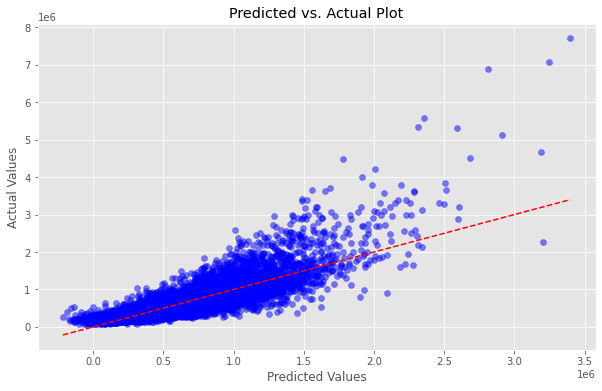

In [ ]:
# Extract actual and predicted values
actual_values = y
predicted_values = third_results.fittedvalues

# Plot actual values against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, actual_values, color='blue', alpha=0.5)
plt.plot([min(predicted_values), max(predicted_values)], [min(predicted_values), max(predicted_values)], color='red', linestyle='--')  # Add diagonal line for reference
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Plot')
plt.show()

The points are somewhat close to the diagonal line, indicating that the model's predictions are accurate but alot of them still deviate significantly from the diagonal line, which suggests that the model may have systematic errors or biases.

The coefficients indicate the impact of each independent variable on the dependent variable (house price). For instance, the coefficients for features like waterfront, view, grade, and latitude (lat) are relatively high, indicating their significant influence on house prices.

Features such as bedrooms, bathrooms, square footage (sqft_living), condition, and age also have noticeable impacts on house prices, albeit with smaller coefficients.
Optimization Strategies:

Focus is on properties with waterfront views, as they tend to command significantly higher prices.

Key Factors Influencing House Sales:

Bedrooms, Bathrooms, and Square Footage: These features have significant positive coefficients, indicating that they strongly influence house prices.

Waterfront and View: Properties with waterfront views or attractive scenery command higher prices.

Location: The coefficients for variables like latitude, longitude, and zipcode suggest that location plays a crucial role in determining house prices.

Property Condition and Grade: Higher condition and grade ratings are associated with higher prices.

**FEATURE SELECTION AND FEATURE ENGINEERING**

We need to now select the features that have the most effect on price  and see if we can also do feature engineering with some independent variables

**Feature Engineering**

In [ ]:
# Select relevant columns and calculate total square footage
df2['total_sqft'] = df2['sqft_living'] + df2['sqft_lot'] + df2['sqft_above'] + df2['sqft_basement']

# Select relevant columns and calculate total square footage15
df2['total_sqft15'] = df2['sqft_living15'] + df2['sqft_lot15']

**Feature Selection**

In [ ]:
# Separate features and target variable
X = df2.drop(['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'month', 'floors',
              'sqft_living15', 'sqft_lot15' ], axis=1)
y = df2['price']

# Initialize the estimator for RFE (e.g., Linear Regression)
lr_rfe = LinearRegression()

# Initialize RFE and specify the number of desired features
num_features_to_select = 4
select = RFE(lr_rfe, n_features_to_select=num_features_to_select)

# Initialize StandardScaler
ss = StandardScaler()

# Fit StandardScaler to the data
ss.fit(X)

# Transform the features using StandardScaler
X_scaled = ss.transform(X)

# Fit RFE to the scaled data
select.fit(X=X_scaled, y=y)

# Get selected features
selected_features = X.columns[select.support_]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['bathrooms', 'grade', 'yr_built', 'age'], dtype='object')


In [ ]:
fourth_model = sm.OLS(y, sm.add_constant(X))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2910.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:13:03   Log-Likelihood:            -2.9594e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21582   BIC:                         5.920e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.407e+07   7.05e+06     -4.836   

With dropped features such as month and floors and performing feature engineering, the adjusted R_squared has significantly reduced meaning that our previous model was better than our new model. We can improve our model by training and testing our dataset

Key Factors Influencing House Sales:

Bathrooms, Grade, and View: These features exhibit the highest coefficients, indicating strong positive associations with house prices. Agents should emphasize properties with higher bathroom counts, better grades, and attractive views to maximize sales potential.

Waterfront: Properties with waterfront locations command significantly higher prices. Agents should highlight waterfront features in listings to attract buyers seeking premium properties.

Location and Condition: Factors like latitude, longitude, and zipcode influence house prices. Agents should consider the desirability of locations and property conditions when pricing listings and advising clients.

**Model Training**

In [ ]:
#Splitting the data for train & test
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.25,random_state=42)

# Initialize and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

#Results from the trained data
model = sm.OLS(y_train, X_train)
result =model.fit()
print(result.summary())

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              9660.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:13:03   Log-Likelihood:                     -2.2176e+05
No. Observations:               16197   AIC:                                  4.435e+05
Df Residuals:                   16183   BIC:                                  4.436e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Key Factors Influencing House Sales:

Bathrooms, Grade, and View: These features exhibit significant coefficients, indicating strong positive associations with house prices.

Waterfront: Properties with waterfront locations continue to show a substantial impact on prices.

Location and Condition: Features like latitude, longitude, and condition still influence house prices significantly.

Our predicted R-squared is significantly lower than the R-squared in our baseline model.
Let us use polynomial regression to improve our model

**PolynomialFeatures(degree=2)**

In [ ]:
# Instantiate PolynomialFeatures object with the degree of polynomial features you want
poly = PolynomialFeatures(degree=2)

# Fit and transform your original features to generate polynomial features
X_poly = poly.fit_transform(X)

#Splitting the data for train & test
X_train,X_test,y_train,y_test = train_test_split(X_poly, y,test_size = 0.25,random_state=42)

# Initialize and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 32866308933.73558
R-squared: 0.7604491378729656


**PolynomialFeatures(degree=3)**

In [ ]:
# Instantiate PolynomialFeatures object with the degree of polynomial features you want
poly = PolynomialFeatures(degree=3)  # You can adjust the degree as needed

# Fit and transform your original features to generate polynomial features
X_poly = poly.fit_transform(X)

#Splitting the data for train & test
X_train,X_test,y_train,y_test = train_test_split(X_poly, y,test_size = 0.25,random_state=42)

# Initialize and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 58668799233.46757
R-squared: 0.5723839429407549


**PolynomialFeatures(degree=4)**

In [ ]:
# Instantiate PolynomialFeatures object with the degree of polynomial features you want
poly = PolynomialFeatures(degree=4)

# Fit and transform your original features to generate polynomial features
X_poly = poly.fit_transform(X)

#Splitting the data for train & test
X_train,X_test,y_train,y_test = train_test_split(X_poly, y,test_size = 0.25,random_state=42)

# Initialize and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3576563275995.3423
R-squared: -25.068300457589423


**PolynomialFeatures(degree=5)**

**Mean Squared Error (MSE)**

The first model has an MSE of approximately 32,866,308,934, indicating that, on average, the squared difference between the predicted and actual house prices is around 32.87 billion.

The second model has a higher MSE of approximately 58,668,799,233, suggesting that it performs worse than the first model, as the errors are larger on average.

The third and fourth models have significantly higher MSE values, indicating that they perform much worse compared to the first two models. The MSE values are extremely large, which suggests that these models are not performing well at all.

**R-squared (R2)**

The first model has an R-squared value of approximately 0.76, indicating that around 76% of the variance in the house prices can be explained by the model.

The second model has a lower R-squared value of approximately 0.57, indicating that it explains less of the variance in the house prices compared to the first model.

The third and fourth models have negative R-squared values, which is highly unusual and suggests that these models are performing worse than a model that simply predicts the mean of the target variable.
Conclusions:

The first model performs the best among the ones evaluated, as it has the lowest MSE and the highest R-squared value.

The second model performs worse than the first model but better than the third and fourth models.

The third and fourth models perform extremely poorly, with very high MSE values and negative R-squared values, indicating that they are not suitable for predicting house prices.

**RECOMMENDATIONS**

**For Real Estate Agents**

Key Factors Influencing House Sales:

Bathrooms, Grade, and View: These features exhibit significant coefficients, indicating strong positive associations with house prices. Agents should focus on properties with higher bathroom counts, better grades, and attractive views to optimize sales potential.

Waterfront: Properties with waterfront locations continue to show a substantial impact on prices. Agents should highlight waterfront features in listings to attract buyers seeking premium properties.

Location and Condition: Features like latitude, longitude, and condition still influence house prices significantly. Agents should consider these factors when advising clients on pricing strategies and property marketing.

Optimizing Sales Strategies:

Emphasize properties with desirable features such as waterfront access, high-grade ratings, and attractive views to maximize selling prices and shorten listing times.

Utilize data-driven insights to target marketing efforts towards potential buyers interested in specific property attributes.

Provide guidance to sellers on property renovations and upgrades that could increase market value and attract more buyers.

**For Homebuyers**

Understanding Trends in House Prices:

Location and Features: Consider the influence of factors like waterfront access, grade, and view on house prices. Properties with these attributes may command higher prices and offer better investment potential.

Age and Renovation: Assess the impact of property age and renovation status on pricing. Renovated properties may offer better value for money, while newer properties may require less maintenance.

Optimizing Investment Potential:

Evaluate properties based on key factors like total square footage, bathrooms, and condition to ensure they meet your criteria and offer good value relative to their price.

Consider properties in desirable locations with amenities and features that align with your preferences and lifestyle.